In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

MAX_ROWS = 10
pd.set_option('display.max_rows', MAX_ROWS)
pd.set_option('display.max_columns', 200)
 
sns.set_style("whitegrid")
sns.set_context("paper")

%matplotlib inline

In [11]:
df = pd.read_csv(r'...\Subte\totales.csv',parse_dates=['FECHA','DESDE','HASTA'])

In [12]:
df.head(10)

,FECHA,DESDE,HASTA,LINEA,ESTACION,TOTAL
0,2015-01-01,2019-10-30 05:00:00,2019-10-30 05:15:00,LINEA_H,CASEROS,0.0
1,2015-01-01,2019-10-30 05:30:00,2019-10-30 05:45:00,LINEA_A,PLAZA MISERERE,0.0
2,2015-01-01,2019-10-30 05:30:00,2019-10-30 05:45:00,LINEA_D,CATEDRAL,0.0
3,2015-01-01,2019-10-30 05:30:00,2019-10-30 05:45:00,LINEA_D,CONGRESO DE TUCUMAN,0.0
4,2015-01-01,2019-10-30 06:00:00,2019-10-30 06:15:00,LINEA_C,INDEPENDENCIA,0.0
5,2015-01-01,2019-10-30 06:30:00,2019-10-30 06:45:00,LINEA_C,INDEPENDENCIA,0.0
6,2015-01-01,2019-10-30 06:30:00,2019-10-30 06:45:00,LINEA_D,CONGRESO DE TUCUMAN,0.0
7,2015-01-01,2019-10-30 06:45:00,2019-10-30 07:00:00,LINEA_C,SAN JUAN,1.0
8,2015-01-01,2019-10-30 06:45:00,2019-10-30 07:00:00,LINEA_E,AVENIDA LA PLATA,0.0
9,2015-01-01,2019-10-30 07:15:00,2019-10-30 07:30:00,LINEA_A,PLAZA MISERERE,0.0


In [13]:
df['year'] = df['FECHA'].apply(lambda row: row.year)
df['month'] = df['FECHA'].apply(lambda row: row.month)
df['wday'] = df['FECHA'].apply(lambda row: row.dayofweek)
df['Dhour'] = df['DESDE'].apply(lambda row: row.hour)
df['Hhour'] = df['HASTA'].apply(lambda row: row.hour)

In [14]:
df['turno'] = 0

In [15]:
df.loc[(df['Dhour']>=0)&(df['Hhour']<=7),'turno'] = 'Manana'
df.loc[(df['Dhour']>=7)&(df['Hhour']<=12),'turno'] = 'Pico man'
df.loc[(df['Dhour']>=12)&(df['Hhour']<=16),'turno'] = 'Tarde'
df.loc[(df['Dhour']>=16)&(df['Hhour']<=20),'turno'] = 'Pico tarde'
df.loc[(df['Dhour']>=20)&(df['Hhour']<=24),'turno'] = 'Noche'

In [16]:
df = df.drop(['DESDE','HASTA','Dhour','Hhour'],axis=1)

In [17]:
df['fare'] = 0

In [18]:
df.set_index('FECHA',inplace=True)

In [19]:
df.loc['2014-01-01':'2014-02-28','fare'] = 3.5
df.loc['2014-03-01':'2016-10-31','fare'] = 4.5
df.loc['2016-11-01':'2018-07-31','fare']= 7.5
df.loc['2018-08-01':'2018-10-31','fare'] = 12.5
df.loc['2018-11-01':'2018-11-30','fare'] = 13.5
df.loc['2018-12-01':'2018-12-31','fare'] = 14.5
df.reset_index(inplace=True)



In [20]:
df.head(10)

,FECHA,LINEA,ESTACION,TOTAL,year,month,wday,turno,fare
0,2015-01-01,LINEA_H,CASEROS,0.0,2015,1,3,Manana,4.5
1,2015-01-01,LINEA_A,PLAZA MISERERE,0.0,2015,1,3,Manana,4.5
2,2015-01-01,LINEA_D,CATEDRAL,0.0,2015,1,3,Manana,4.5
3,2015-01-01,LINEA_D,CONGRESO DE TUCUMAN,0.0,2015,1,3,Manana,4.5
4,2015-01-01,LINEA_C,INDEPENDENCIA,0.0,2015,1,3,Manana,4.5
5,2015-01-01,LINEA_C,INDEPENDENCIA,0.0,2015,1,3,Manana,4.5
6,2015-01-01,LINEA_D,CONGRESO DE TUCUMAN,0.0,2015,1,3,Manana,4.5
7,2015-01-01,LINEA_C,SAN JUAN,1.0,2015,1,3,Manana,4.5
8,2015-01-01,LINEA_E,AVENIDA LA PLATA,0.0,2015,1,3,Manana,4.5
9,2015-01-01,LINEA_A,PLAZA MISERERE,0.0,2015,1,3,Pico man,4.5


En primer lugar, cargamos el dataset con los totales diarios y le asignamos las tarifas correspondientes a cada día

## Análisis General

In [21]:
df.groupby('fare').sum()

,TOTAL,year,month,wday
fare,,,,
3.5,35148451.0,655832918,486532,934999
4.5,761943490.0,11081470250,36064327,16103422
7.5,588927607.0,7497533325,23131788,10936830
12.5,96372624.0,1060961482,4728156,1557866
13.5,30456231.0,354152946,1930467,513150
14.5,16380372.0,245233414,1458276,373036


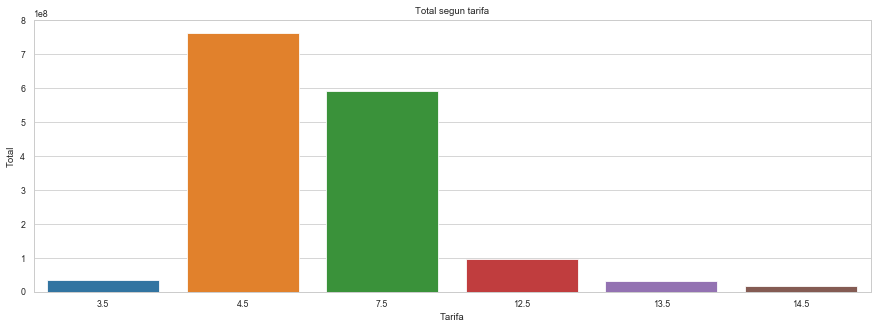

In [22]:
fares = df.groupby('fare').sum()
plt.figure(figsize=(15,5))
plt.title('Total segun tarifa')
sns.barplot(x=fares.index,y=fares['TOTAL'])
plt.xlabel('Tarifa')
plt.ylabel('Total')
plt.show()

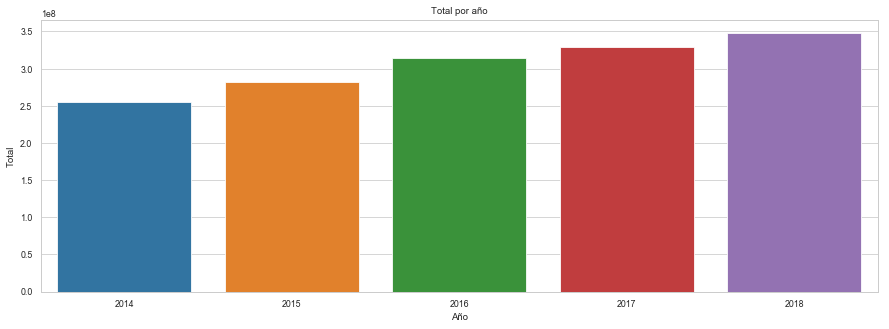

In [23]:
year = df.groupby('year').sum()
plt.figure(figsize=(15,5))
plt.title('Total por año')
sns.barplot(x=year.index,y=year['TOTAL'])
plt.xlabel('Año')
plt.ylabel('Total')
plt.show()

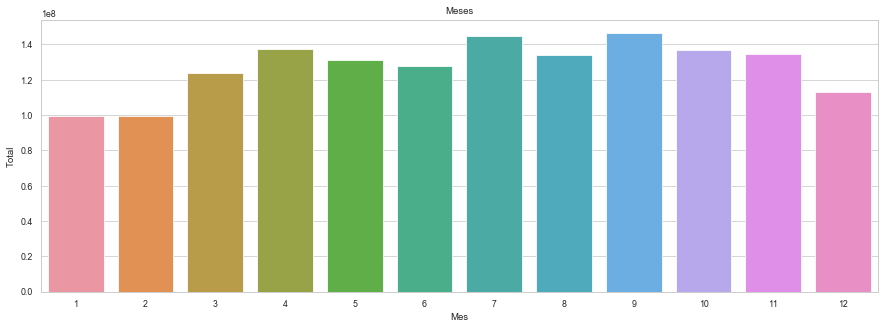

In [24]:
mes = df.groupby('month').sum()
plt.figure(figsize=(15,5))
plt.title('Meses')
sns.barplot(x=mes.index,y=mes['TOTAL'])
plt.xlabel('Mes')
plt.ylabel('Total')
plt.show()

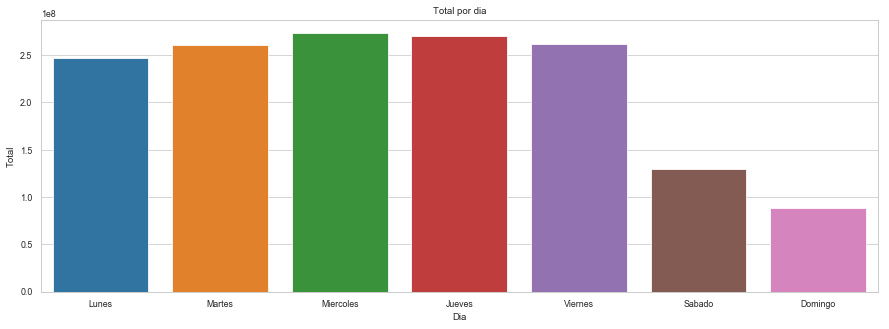

In [25]:
dayorder = [ 'Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado','Domingo']
day = df.groupby('wday').sum()
plt.figure(figsize=(15,5))
plt.title('Total por dia')
ax =sns.barplot(x=day.index,y=day['TOTAL'])
plt.xlabel('Dia')
ax.set_xticklabels(dayorder)
plt.ylabel('Total')
plt.show()

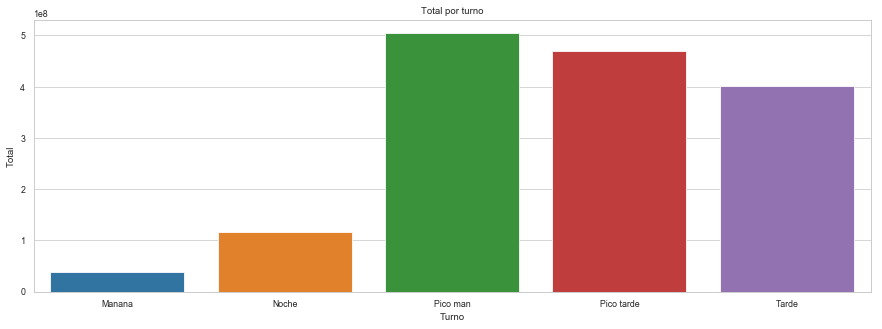

In [26]:
turno = df.groupby('turno').sum()
plt.figure(figsize=(15,5))
plt.title('Total por turno')
ax =sns.barplot(x=turno.index,y=turno['TOTAL'])
plt.xlabel('Turno')
plt.ylabel('Total')
plt.show()

### Luego de tener una idea general sobre los números (anuales, mensuales, diarios, turnos y por tarifa) continuaremos por limpiar los datos respecto a las diversas líneas y estaciones del subte para analizarlos posteriormente

Ajustamos las líneas a un valor único en cada una

In [27]:
df.replace({'LINEA_A':'A','LineaA':'A','LINEA_B':'B','LineaB':'B','LINEA_C':'C','LineaC':'C','LINEA_D':'D','LineaD':'D','LINEA_E':'E','LineaE':'E','LINEA_H':'H','LineaH':'H'},inplace=True)

In [28]:
df['LINEA'].unique()

array(['H', 'A', 'D', 'C', 'E', 'B', 'TALLER/PRUEBAS'], dtype=object)

Ahora evaluaremos los nombres de las estaciones, quitando asi los caracteres y unificando un valor único por cada estación

In [29]:
df['ESTACION'].unique()

array(['CASEROS', 'PLAZA MISERERE', 'CATEDRAL', 'CONGRESO DE TUCUMAN',
       'INDEPENDENCIA', 'SAN JUAN', 'AVENIDA LA PLATA', 'CONSTITUCION',
       'CONGRESO', 'PUAN', 'MARIANO MORENO', 'CALLAO',
       'MINISTRO CARRANZA', 'BOEDO', 'VARELA', 'CORRIENTES', 'ALBERTI',
       'CARABOBO', 'FLORES', 'PLAZA DE MAYO', 'AVENIDA DE MAYO',
       'GENERAL SAN MARTIN', 'RETIRO', '9 DE JULIO', 'BULNES',
       'FACULTAD DE MEDICINA', 'JOSE HERNANDEZ', 'JURAMENTO', 'OLLEROS',
       'PALERMO', 'ENTRE RIOS', 'JOSE MARIA MORENO', 'JUJUY',
       'PZA. DE LOS VIRREYES', 'SAN JOSE', 'HOSPITALES', 'ONCE',
       'VENEZUELA', 'ACOYTE', 'CASTRO BARROS', 'LIMA', 'LORIA', 'PASCO',
       'PIEDRAS', 'PRIMERA JUNTA', 'RIO DE JANEIRO', 'SAENZ PEÑA',
       'SAN PEDRITO', 'DIAGONAL NORTE', 'LAVALLE', 'PLAZA ITALIA',
       'PUEYRREDON.D', 'SCALABRINI ORTIZ', 'BOLIVAR', 'EMILIO MITRE',
       'GENERAL BELGRANO', 'HUMBERTO I', 'INCLAN', 'PERU', 'AGUERO',
       'TRIBUNALES', 'INDEPENDENCIA.H', 'MEDALLA MILAGRO

In [42]:
df['ESTACION']=df['ESTACION'].apply(lambda row: str.upper(row))#limpiando valores en minuscula
df['ESTACION']=df['ESTACION'].apply(lambda row: str.strip(row))#limpiando valores con espacios en los bordes del valor



In [45]:
sp=df[df['LINEA']=='A']['ESTACION'].unique() #Limpiando los valores rotos especificamente de la linea A

In [46]:
sp

array(['PLAZA MISERERE', 'CONGRESO', 'PUAN', 'ALBERTI', 'CARABOBO',
       'FLORES', 'PLAZA DE MAYO', 'ACOYTE', 'CASTRO BARROS', 'LIMA',
       'LORIA', 'PASCO', 'PIEDRAS', 'PRIMERA JUNTA', 'RIO DE JANEIRO',
       'SAENZ PEÑA', 'SAN PEDRITO', 'PERU',
       'SAENZ PEÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x91A',
       'SAENZ PEÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â±A',
       'SAENZ PEÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â±A',
       'SAENZ PEÃ\x83Â\x83Ã\x82Â±A', 'SAENZ PEÃ±A', 'SAENZ PEÃ\x83Â±A'],
      dtype=object)

In [47]:
sp=sp[18:24]

In [48]:
sp

array(['SAENZ PEÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x91A',
       'SAENZ PEÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â±A',
       'SAENZ PEÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â±A',
       'SAENZ PEÃ\x83Â\x83Ã\x82Â±A', 'SAENZ PEÃ±A', 'SAENZ PEÃ\x83Â±A'],
      dtype=object)

In [49]:
dsp = {}
for i in sp:
    dsp[i]='SAENZ PEÑA'#creamos un diccionario con {Valor a remplazar:valor remplazado}
    

In [51]:
dsp

{'SAENZ PEÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x91A': 'SAENZ PEÑA',
 'SAENZ PEÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x82Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â±A': 'SAENZ PEÑA',
 'SAENZ PEÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â±A': 'SAENZ PEÑA',
 'SAENZ PEÃ\x83Â\x83Ã\x82Â±A': 'SAENZ PEÑA',
 'SAENZ PEÃ±A': 'SAENZ PEÑA',
 'SAENZ PEÃ\x83Â±A': 'SAENZ PEÑA'}

In [52]:
df['ESTACION'].replace(dsp,inplace=True)

In [53]:
df['ESTACION'].unique()

array(['CASEROS', 'PLAZA MISERERE', 'CATEDRAL', 'CONGRESO DE TUCUMAN',
       'INDEPENDENCIA', 'SAN JUAN', 'AVENIDA LA PLATA', 'CONSTITUCION',
       'CONGRESO', 'PUAN', 'MARIANO MORENO', 'CALLAO',
       'MINISTRO CARRANZA', 'BOEDO', 'VARELA', 'CORRIENTES', 'ALBERTI',
       'CARABOBO', 'FLORES', 'PLAZA DE MAYO', 'AVENIDA DE MAYO',
       'GENERAL SAN MARTIN', 'RETIRO', '9 DE JULIO', 'BULNES',
       'FACULTAD DE MEDICINA', 'JOSE HERNANDEZ', 'JURAMENTO', 'OLLEROS',
       'PALERMO', 'ENTRE RIOS', 'JOSE MARIA MORENO', 'JUJUY',
       'PZA. DE LOS VIRREYES', 'SAN JOSE', 'HOSPITALES', 'ONCE',
       'VENEZUELA', 'ACOYTE', 'CASTRO BARROS', 'LIMA', 'LORIA', 'PASCO',
       'PIEDRAS', 'PRIMERA JUNTA', 'RIO DE JANEIRO', 'SAENZ PEÑA',
       'SAN PEDRITO', 'DIAGONAL NORTE', 'LAVALLE', 'PLAZA ITALIA',
       'PUEYRREDON.D', 'SCALABRINI ORTIZ', 'BOLIVAR', 'EMILIO MITRE',
       'GENERAL BELGRANO', 'HUMBERTO I', 'INCLAN', 'PERU', 'AGUERO',
       'TRIBUNALES', 'INDEPENDENCIA.H', 'MEDALLA MILAGRO

In [54]:
ag=df[df['LINEA']=='D']['ESTACION'].unique()#mismo procedimiento de arriba con estacion Aguero

In [55]:
ag=ag[16:22]

In [56]:
dsp = {}
for i in ag:
    dsp[i]='AGUERO'

In [57]:
df['ESTACION'].replace(dsp,inplace=True)

In [58]:
df['ESTACION'].unique()

array(['CASEROS', 'PLAZA MISERERE', 'CATEDRAL', 'CONGRESO DE TUCUMAN',
       'INDEPENDENCIA', 'SAN JUAN', 'AVENIDA LA PLATA', 'CONSTITUCION',
       'CONGRESO', 'PUAN', 'MARIANO MORENO', 'CALLAO',
       'MINISTRO CARRANZA', 'BOEDO', 'VARELA', 'CORRIENTES', 'ALBERTI',
       'CARABOBO', 'FLORES', 'PLAZA DE MAYO', 'AVENIDA DE MAYO',
       'GENERAL SAN MARTIN', 'RETIRO', '9 DE JULIO', 'BULNES',
       'FACULTAD DE MEDICINA', 'JOSE HERNANDEZ', 'JURAMENTO', 'OLLEROS',
       'PALERMO', 'ENTRE RIOS', 'JOSE MARIA MORENO', 'JUJUY',
       'PZA. DE LOS VIRREYES', 'SAN JOSE', 'HOSPITALES', 'ONCE',
       'VENEZUELA', 'ACOYTE', 'CASTRO BARROS', 'LIMA', 'LORIA', 'PASCO',
       'PIEDRAS', 'PRIMERA JUNTA', 'RIO DE JANEIRO', 'SAENZ PEÑA',
       'SAN PEDRITO', 'DIAGONAL NORTE', 'LAVALLE', 'PLAZA ITALIA',
       'PUEYRREDON.D', 'SCALABRINI ORTIZ', 'BOLIVAR', 'EMILIO MITRE',
       'GENERAL BELGRANO', 'HUMBERTO I', 'INCLAN', 'PERU', 'AGUERO',
       'TRIBUNALES', 'INDEPENDENCIA.H', 'MEDALLA MILAGRO

Ahora evaluaremos las cantidades de estaciones por línea

In [59]:
print(df[df['LINEA']=='A']['ESTACION'].unique().shape,' A')
print(df[df['LINEA']=='B']['ESTACION'].unique().shape,' B')
print(df[df['LINEA']=='C']['ESTACION'].unique().shape,' C')
print(df[df['LINEA']=='D']['ESTACION'].unique().shape,' D')
print(df[df['LINEA']=='E']['ESTACION'].unique().shape,' E')
print(df[df['LINEA']=='H']['ESTACION'].unique().shape,' H')

(18,)  A
(18,)  B
(9,)  C
(18,)  D
(16,)  E
(12,)  H


Observamos que las líneas B,D y E tienen valores superiores. Revisaremos cada caso a continuación y unificaremos los valores

In [60]:
df_a = df[df['LINEA']=='A']
df_b= df[df['LINEA']=='B']
df_c= df[df['LINEA']=='C']
df_d= df[df['LINEA']=='D']
df_e= df[df['LINEA']=='E']
df_h= df[df['LINEA']=='H']

In [61]:
df_b['ESTACION'].replace({'CALLAO':'CALLAO.B'},inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [62]:
df_d['ESTACION'].replace({'CALLAO.':'CALLAO','PUEYRREDON.':'PUEYRREDON.D'},inplace=True)

In [63]:
df_e['ESTACION'].replace({'INDEPENDENCIA.':'INDEPENDENCIA.H'},inplace=True)

In [64]:
df=pd.concat([df_a,df_b,df_c,df_d,df_e,df_h])

In [65]:
print(df[df['LINEA']=='A']['ESTACION'].unique().shape,' A')
print(df[df['LINEA']=='B']['ESTACION'].unique().shape,' B')
print(df[df['LINEA']=='C']['ESTACION'].unique().shape,' C')
print(df[df['LINEA']=='D']['ESTACION'].unique().shape,' D')
print(df[df['LINEA']=='E']['ESTACION'].unique().shape,' E')
print(df[df['LINEA']=='H']['ESTACION'].unique().shape,' H')

(18,)  A
(17,)  B
(9,)  C
(16,)  D
(15,)  E
(12,)  H


De esta forma, unificamos los valores de las estaciones y  eliminamos las entradas de "TALLER DE PRUEBA" que no suman ningún dato

## Análisis por Línea

Línea A

In [66]:
EstorderA ={'ACOYTE':12, 'ALBERTI':7, 'CARABOBO':15, 'CASTRO BARROS':10, 'CONGRESO':5,
       'FLORES':16, 'LIMA':3, 'LORIA':9, 'PASCO':6, 'PERU':1, 'PIEDRAS':2,
       'PLAZA DE MAYO':0, 'PLAZA MISERERE':8, 'PRIMERA JUNTA':13, 'PUAN':14,
       'RIO DE JANEIRO':11, 'SAENZ PEÑA':4, 'SAN PEDRITO':17}

In [67]:
labels = [item[0] for item in sorted(EstorderA.items(), key=lambda kv: kv[1])]

In [69]:
df_a['orden'] = df_a['ESTACION'].replace(EstorderA)

In [70]:
estacion = df_a.groupby('orden').sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

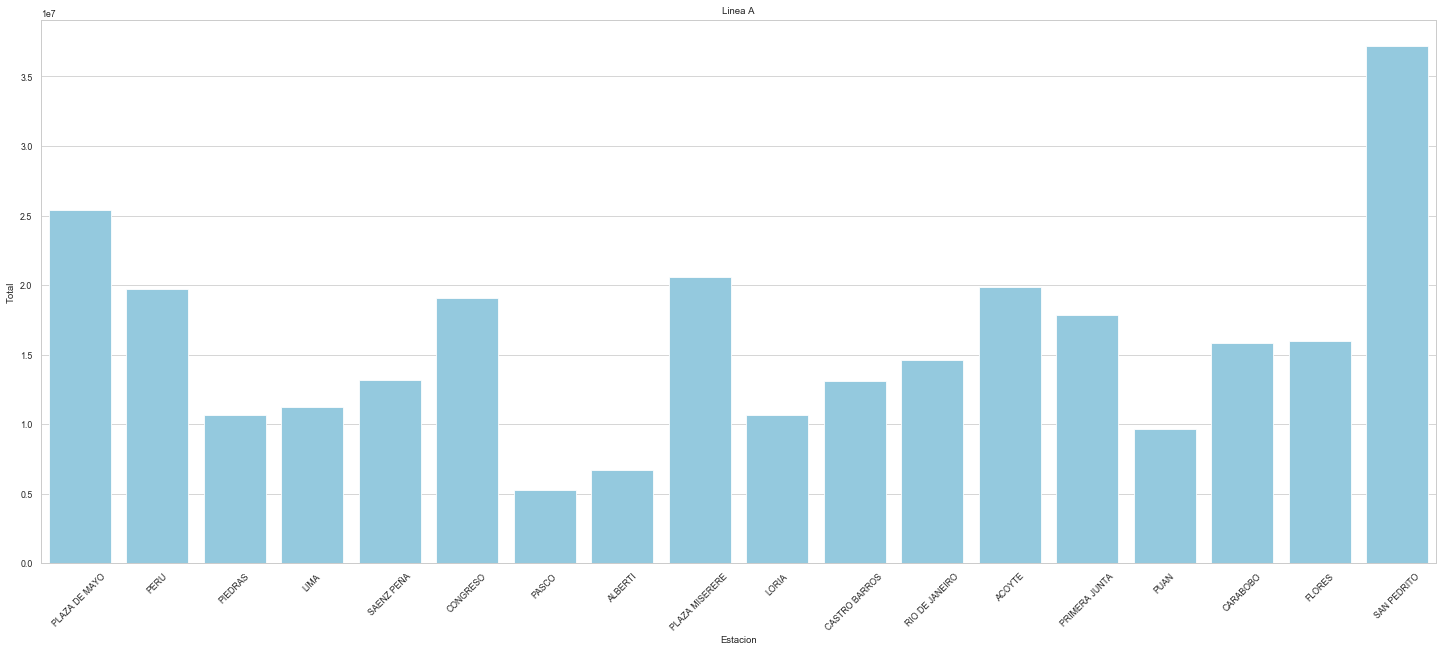

In [72]:
plt.figure(figsize=(25,10))
plt.title('Linea A')
ax = sns.barplot(x=estacion.index,y=estacion['TOTAL'],color='skyblue')
plt.xlabel('Estacion')
plt.ylabel('Total')
ax.set_xticklabels(labels)
plt.xticks(rotation=45)

Línea B

In [73]:
EstorderB ={'FLORIDA':1, 'ROSAS':16, 'CALLAO.B':4, 'CARLOS GARDEL':7,
       'FEDERICO LACROZE':12, 'DORREGO':11, 'ANGEL GALLARDO':9,
       'CARLOS PELLEGRINI':2, 'ECHEVERRIA':15, 'LEANDRO N. ALEM':0, 'LOS INCAS':14,
       'MALABIA':10, 'MEDRANO':8, 'PASTEUR':5, 'PUEYRREDON':6, 'TRONADOR':13,
       'URUGUAY':3}

In [74]:
labels = [item[0] for item in sorted(EstorderA.items(), key=lambda kv: kv[1])]

In [75]:
df_b['orden'] = df_b['ESTACION'].replace(EstorderB)

In [76]:
estacion = df_b.groupby('orden').sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

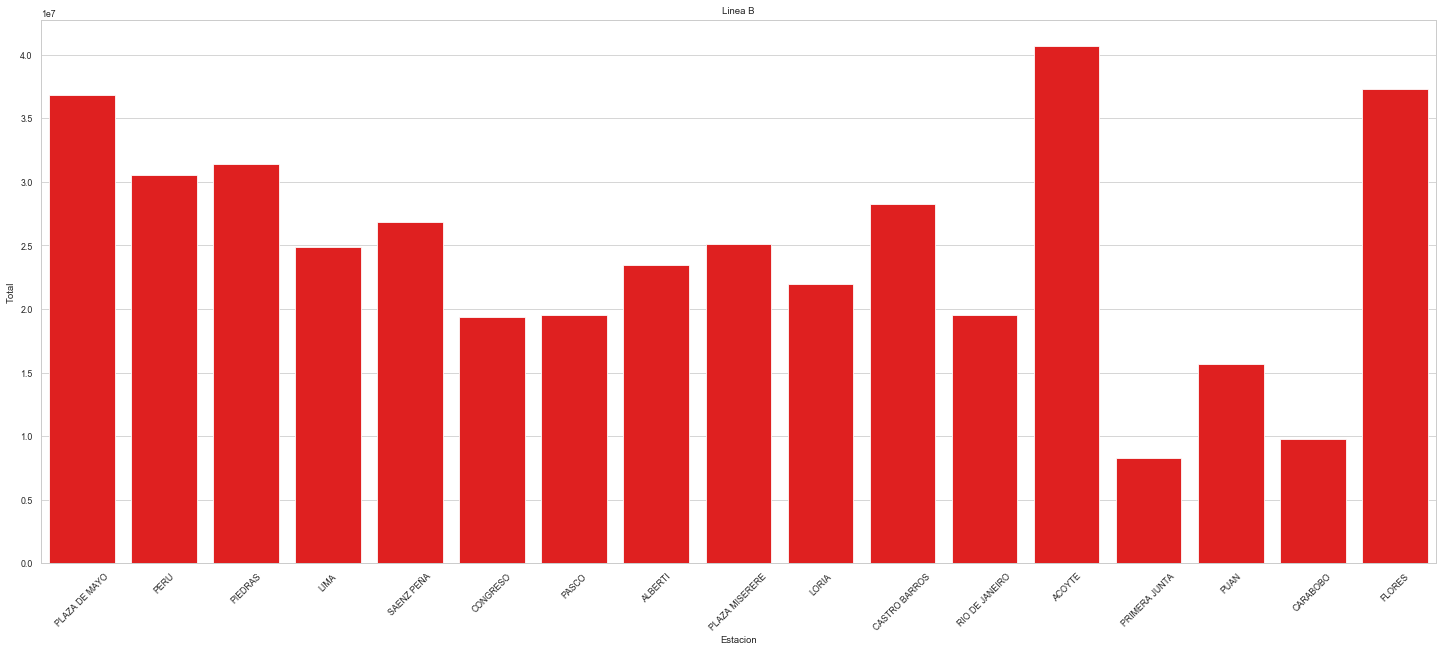

In [77]:
plt.figure(figsize=(25,10))
plt.title('Linea B')
ax = sns.barplot(x=estacion.index,y=estacion['TOTAL'],color='red')
plt.xlabel('Estacion')
plt.ylabel('Total')
ax.set_xticklabels(labels)
plt.xticks(rotation=45)

Línea C

In [78]:
EstorderC = {'AVENIDA DE MAYO':4, 'CONSTITUCION':0, 'DIAGONAL NORTE':5,
       'GENERAL SAN MARTIN':7, 'INDEPENDENCIA':2, 'LAVALLE':6, 'MARIANO MORENO':3,
       'RETIRO':8, 'SAN JUAN':1}

In [79]:
labels = [item[0] for item in sorted(EstorderC.items(), key=lambda kv: kv[1])]

In [80]:
df_c['orden'] = df_c['ESTACION'].replace(EstorderC)

In [81]:
estacion = df_c.groupby('orden').sum()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

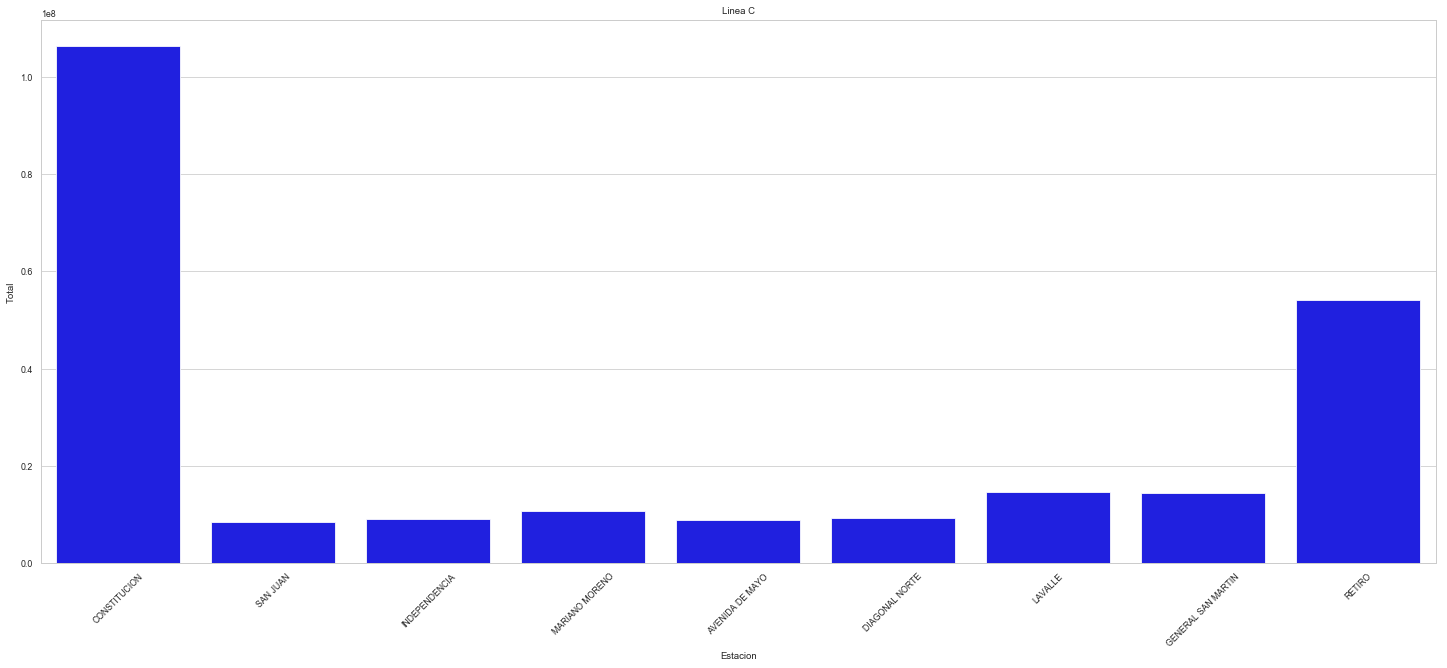

In [82]:
plt.figure(figsize=(25,10))
plt.title('Linea C')
ax = sns.barplot(x=estacion.index,y=estacion['TOTAL'],color='blue')
plt.xlabel('Estacion')
plt.ylabel('Total')
ax.set_xticklabels(labels)
plt.xticks(rotation=45)

Línea D

In [83]:
EstorderD ={'9 DE JULIO':1, 'AGUERO':6, 'BULNES':7, 'CALLAO':3, 'CATEDRAL':0,
       'CONGRESO DE TUCUMAN':15, 'FACULTAD DE MEDICINA':4, 'JOSE HERNANDEZ':13,
       'JURAMENTO':14, 'MINISTRO CARRANZA':11, 'OLLEROS':12, 'PALERMO':10,
       'PLAZA ITALIA':9, 'PUEYRREDON.D':5, 'SCALABRINI ORTIZ':8, 'TRIBUNALES':2}

In [84]:
labels = [item[0] for item in sorted(EstorderD.items(), key=lambda kv: kv[1])]

In [85]:
df_d['orden'] = df_d['ESTACION'].replace(EstorderD)

In [86]:
estacion = df_d.groupby('orden').sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

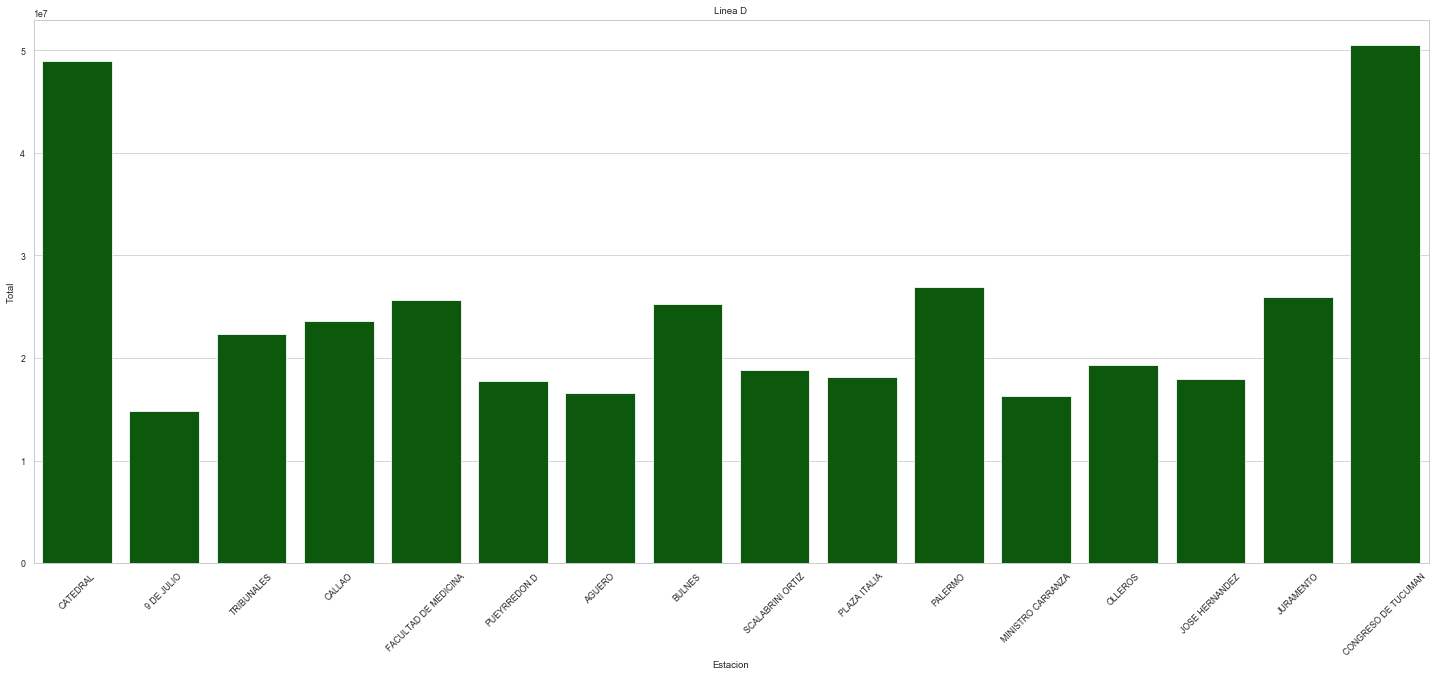

In [87]:
plt.figure(figsize=(25,10))
plt.title('Linea D')
ax = sns.barplot(x=estacion.index,y=estacion['TOTAL'],color='darkgreen')
plt.xlabel('Estacion')
plt.ylabel('Total')
ax.set_xticklabels(labels)
plt.xticks(rotation=45)

Línea E

In [88]:
EstorderE={'AVENIDA LA PLATA':5, 'BOEDO':6, 'BOLIVAR':14, 'EMILIO MITRE':3,
       'ENTRE RIOS':10, 'GENERAL BELGRANO':13, 'INDEPENDENCIA.H':12,
       'JOSE MARIA MORENO':4, 'JUJUY':8, 'MEDALLA MILAGROSA':2, 'PICHINCHA':9,
       'PZA. DE LOS VIRREYES':0, 'SAN JOSE':11, 'URQUIZA':7, 'VARELA':1}

In [89]:
labels = [item[0] for item in sorted(EstorderE.items(), key=lambda kv: kv[1])]

In [90]:
df_e['orden'] = df_e['ESTACION'].replace(EstorderD)

In [91]:
estacion = df_e.groupby('orden').sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

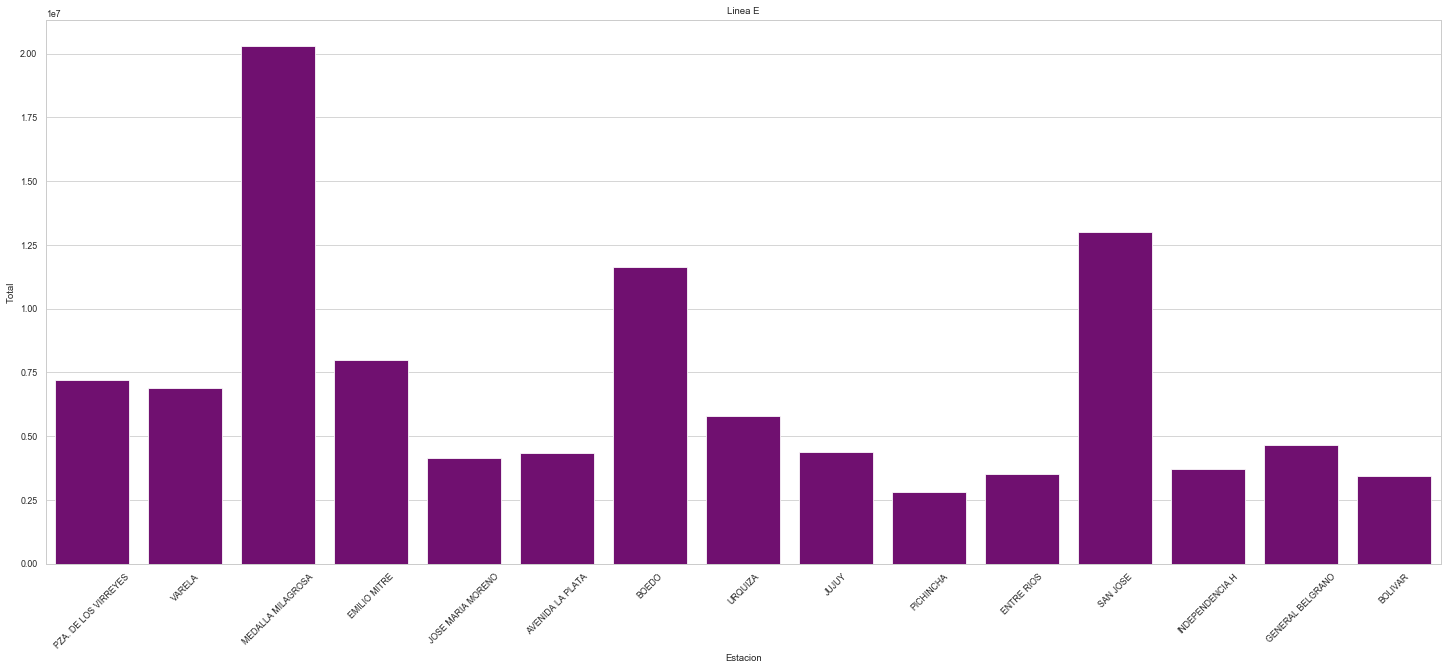

In [92]:
plt.figure(figsize=(25,10))
plt.title('Linea E')
ax = sns.barplot(x=estacion.index,y=estacion['TOTAL'],color='purple')
plt.xlabel('Estacion')
plt.ylabel('Total')
ax.set_xticklabels(labels)
plt.xticks(rotation=45)

Línea H

In [93]:
EstorderH ={'CASEROS':9, 'CORRIENTES':4, 'HOSPITALES':12, 'HUMBERTO I':7, 'INCLAN':8,
       'ONCE':5, 'PATRICIOS':10, 'VENEZUELA':6, 'LAS HERAS':1, 'CORDOBA':3,
       'SANTA FE':2, 'FACULTAD DE DERECHO':0}

In [94]:
labels = [item[0] for item in sorted(EstorderH.items(), key=lambda kv: kv[1])]

In [95]:
df_h['orden'] = df_h['ESTACION'].replace(EstorderH)

In [96]:
estacion = df_h.groupby('orden').sum()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

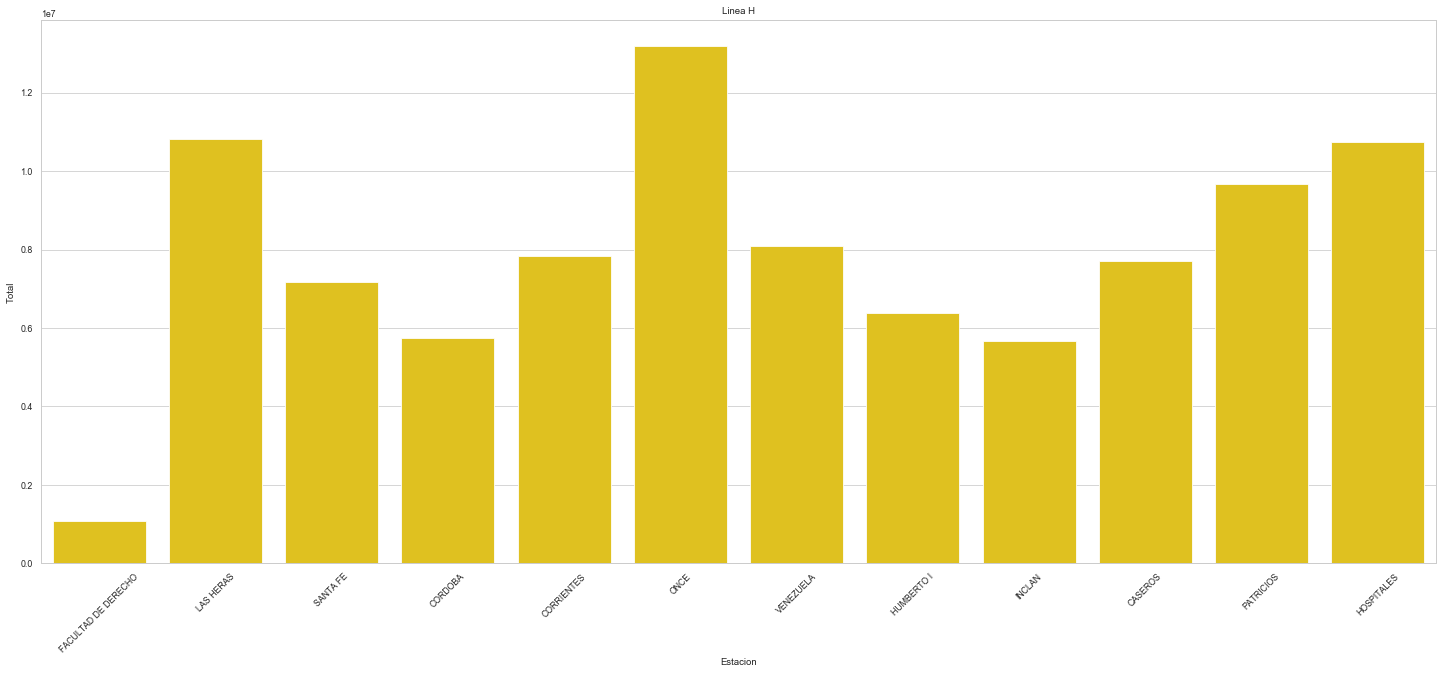

In [97]:
plt.figure(figsize=(25,10))
plt.title('Linea H')
ax = sns.barplot(x=estacion.index,y=estacion['TOTAL'],color='gold')
plt.xlabel('Estacion')
plt.ylabel('Total')
ax.set_xticklabels(labels)
plt.xticks(rotation=45)

A continuación evaluaremos como el promedio de viajantes por línea fue evolucionando año tras año

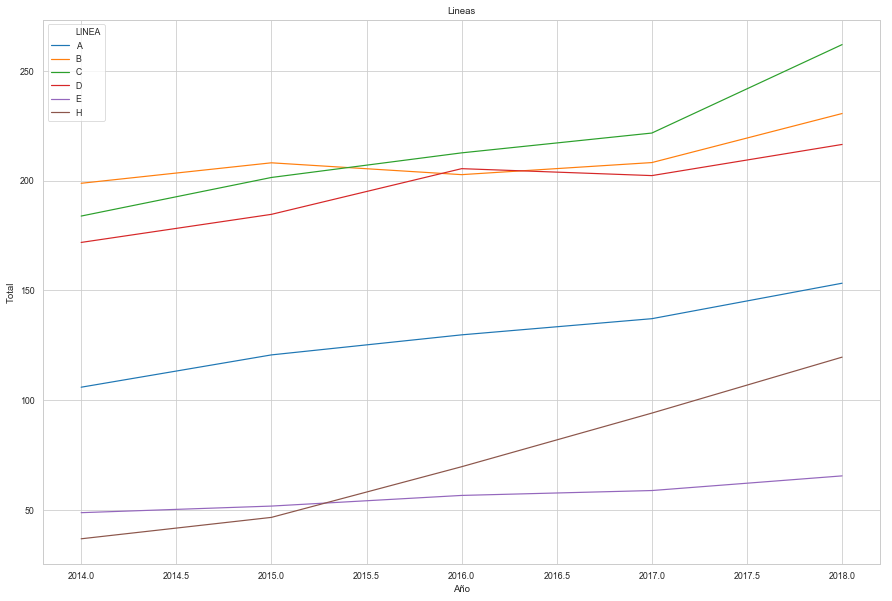

In [66]:
plot=df.pivot_table(values='TOTAL',index=['LINEA','year']).reset_index()
plt.figure(figsize=(15,10))
sns.lineplot(x='year',y='TOTAL',hue='LINEA',data=plot,markers=True)
plt.legend(loc='upper left')
plt.title('Lineas')
plt.xlabel('Año')
plt.ylabel('Total')
plt.show()

# Evaluación vs 2019

###### Luego de evaluar los datos generales del acumulado entre 2014-2018, compararemos los datos del 2018 con los del corriente 2019 para evaluar si la tendencia de crecimiento que se ve en todo el análisis previo continúa

En primer lugar debemos limpiar y aplicar las mismas transformaciones al dataframe del 2019.

In [68]:
df2 = pd.read_csv(r'...\datasets\Subte\datahistorica092019.csv',parse_dates=['fecha','desde','hasta'])

In [69]:
df2.rename(columns={'fecha':'FECHA','linea':'LINEA','estacion':'ESTACION','total':'TOTAL','desde':'DESDE','hasta':'HASTA'},inplace=True)

In [70]:
df2_f = df2.pivot_table(values='TOTAL',index=['FECHA','DESDE','HASTA','LINEA','ESTACION','periodo'],aggfunc=np.sum).reset_index()

In [71]:
df2_f['FECHA'] = df2_f['FECHA'].dt.strftime('%d-%m-%Y')#Utilizamos esta funcion para arreglar entradas mal cargadas

In [72]:
df2_f['FECHA'] = pd.to_datetime(df2_f['FECHA'])

In [73]:
def pre_proc(dfp):
    df=dfp
    df['year'] = df['FECHA'].apply(lambda row: row.year)
    df['month'] = df['FECHA'].apply(lambda row: row.month)
    df['wday'] = df['FECHA'].apply(lambda row: row.dayofweek)
    df['Dhour'] = df['DESDE'].apply(lambda row: row.hour)
    df['Hhour'] = df['HASTA'].apply(lambda row: row.hour)
    df['turno'] = 0
    df.loc[(df['Dhour']>=0)&(df['Hhour']<=7),'turno'] = 'Manana'
    df.loc[(df['Dhour']>=7)&(df['Hhour']<=12),'turno'] = 'Pico man'
    df.loc[(df['Dhour']>=12)&(df['Hhour']<=16),'turno'] = 'Tarde'
    df.loc[(df['Dhour']>=16)&(df['Hhour']<=20),'turno'] = 'Pico tarde'
    df.loc[(df['Dhour']>=20)&(df['Hhour']<=24),'turno'] = 'Noche'
    df = df.drop(['DESDE','HASTA','Dhour','Hhour'],axis=1)
    df.replace({'LINEA_A':'A','LineaA':'A','LINEA_B':'B','LineaB':'B','LINEA_C':'C','LineaC':'C','LINEA_D':'D','LineaD':'D','LINEA_E':'E','LineaE':'E','LINEA_H':'H','LineaH':'H'},inplace=True)
    df['ESTACION']=df['ESTACION'].apply(lambda row: str.upper(row))
    df['ESTACION']=df['ESTACION'].apply(lambda row: str.strip(row))
    return df
    
   #funcion que aplica las transformaciones que fuimos implementando durante la notebook al dataframe del 2019 para dejarlo en el mismo formato
    
    

In [74]:
df2_f = pre_proc(df2_f)

In [75]:
sp1=df2_f[df2_f['LINEA']=='A']['ESTACION'].unique()

In [76]:
sp=list(sp1[16:24])

In [77]:
sp.pop(1)

'SAN PEDRITO'

In [78]:
dsp = {}
for i in sp:
    dsp[i]='SAENZ PEÑA'

In [79]:
df2_f['ESTACION'].replace(dsp,inplace=True)

In [80]:
ag=df2_f[df2_f['LINEA']=='D']['ESTACION'].unique()

In [81]:
ag

array(['9 DE JULIO', 'AGÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â¼ERO',
       'BULNES', 'CALLAO', 'CATEDRAL', 'CONGRESO DE TUCUMAN',
       'FACULTAD DE MEDICINA', 'JOSE HERNANDEZ', 'JURAMENTO',
       'MINISTRO CARRANZA', 'OLLEROS', 'PALERMO', 'PLAZA ITALIA',
       'PUEYRREDON.D', 'SCALABRINI ORTIZ', 'TRIBUNALES',
       'AGÃ\x83Â\x83Ã\x82Â¼ERO', 'AGÃ\x83Â¼ERO', 'AGÜERO'], dtype=object)

In [82]:
ag1 = []
ag1.append(ag[1])
ag1.append(ag[18])
ag1.append(ag[17])
ag1.append(ag[16])

In [83]:
dsp = {}
for i in ag1:
    dsp[i]='AGUERO'

In [84]:
df2_f['ESTACION'].replace(dsp,inplace=True)

In [85]:
print(df2_f[df2_f['LINEA']=='A']['ESTACION'].unique().shape)
print(df2_f[df2_f['LINEA']=='B']['ESTACION'].unique().shape)
print(df2_f[df2_f['LINEA']=='C']['ESTACION'].unique().shape)
print(df2_f[df2_f['LINEA']=='D']['ESTACION'].unique().shape)
print(df2_f[df2_f['LINEA']=='E']['ESTACION'].unique().shape)
print(df2_f[df2_f['LINEA']=='H']['ESTACION'].unique().shape)

(18,)
(17,)
(9,)
(16,)
(18,)
(12,)


In [86]:
df2 = df2_f

In [87]:
df2['fare'] = 0

In [88]:
df2.set_index('FECHA',inplace=True)

In [89]:
df2.loc['2019-01-01':'2019-01-31','fare'] = 15.5
df2.loc['2019-02-01':'2019-03-31','fare'] = 16.5
df2.loc['2019-04-01':'2019-09-30','fare'] = 19
df2.reset_index(inplace=True)
df2.drop('periodo',axis=1,inplace=True)


In [90]:
df = pd.concat([df,df2])

Luego de limpiar los datos del 2019 y aplicarles la misma transformación los unificamos en un mismo dataframe con los datos anteriores. Analisaremos el 2019 en comparación al 2018.

In [91]:
df.set_index('FECHA',inplace=True)

In [92]:
df3 = df.loc['2018-01-01':'2018-09-30']

In [93]:
df3 = pd.concat([df3,df.loc['2019-01-01':'2019-09-30']])
df3.reset_index(inplace=True)

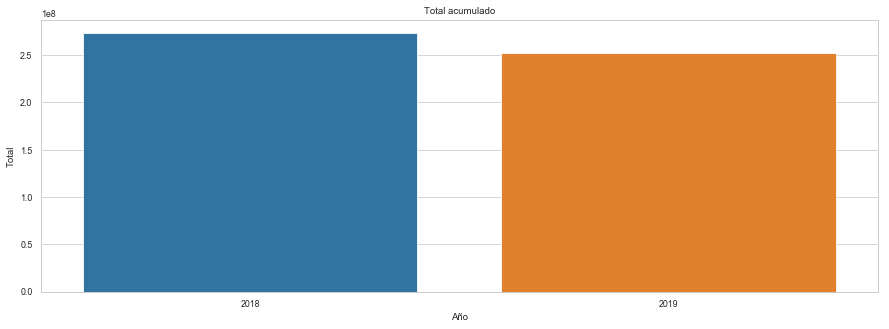

In [94]:
year=df3.groupby('year').sum()
plt.figure(figsize=(15,5))
plt.title('Total acumulado')
sns.barplot(x=year.index,y=year['TOTAL'])
plt.xlabel('Año')
plt.ylabel('Total')
plt.show()

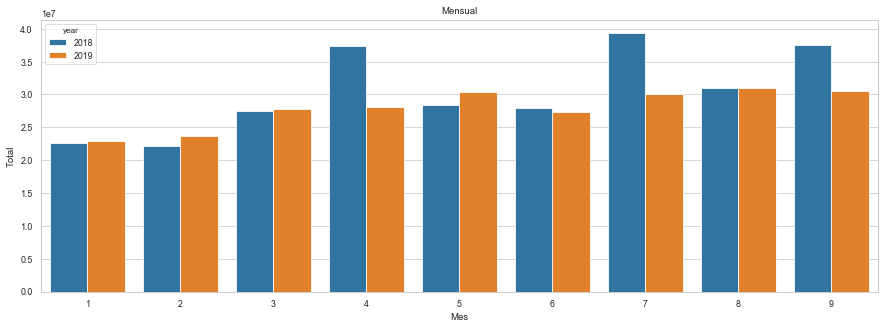

In [95]:
mes=df3.pivot_table(values='TOTAL',index=['year','month'],aggfunc=np.sum).reset_index()
plt.figure(figsize=(15,5))
plt.title('Mensual')
sns.barplot(x=mes.month,y=mes.TOTAL,hue=mes.year)
plt.xlabel('Mes')
plt.ylabel('Total')
plt.show()

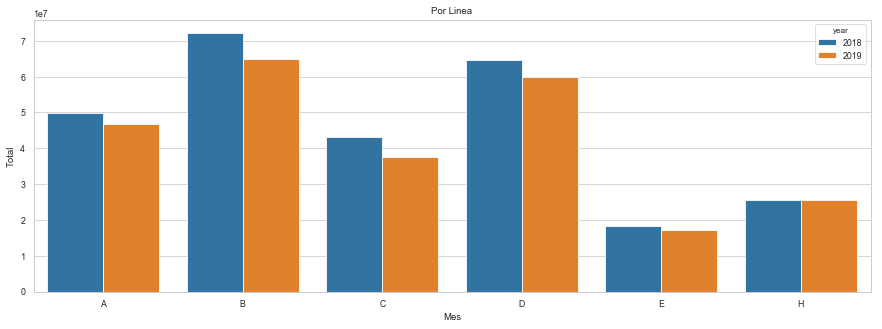

In [96]:
linea=df3.pivot_table(values='TOTAL',index=['year','LINEA'],aggfunc=np.sum).reset_index()
plt.figure(figsize=(15,5))
plt.title('Por Linea')
sns.barplot(x=linea.LINEA,y=linea.TOTAL,hue=linea.year)
plt.xlabel('Linea')
plt.ylabel('Total')
plt.show()

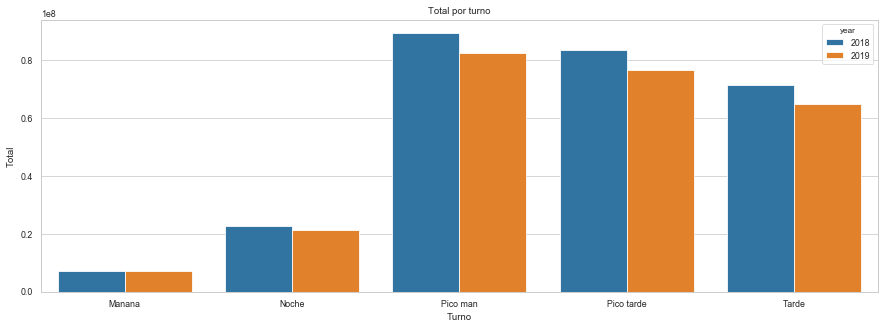

In [97]:
turno = df3.pivot_table(values='TOTAL',index=['year','turno'],aggfunc=np.sum).reset_index()
plt.figure(figsize=(15,5))
plt.title('Total por turno')
ax =sns.barplot(x=turno.turno,y=turno['TOTAL'],hue=turno['year'])
plt.xlabel('Turno')
plt.ylabel('Total')
plt.show()

Finalmente podemos observar que en lo que va del 2019 (analizado al momento de realizar esta notebook - septiembre) podemos observar que la cantidad de viajes totales en subte esta decreciendo.

In [ ]:
df3.to_csv(r'...\Subte\datafinal.csv',index=False)